# Aerodynamic break

We shall repeat a basic method of separating variables for solving ordinary differential equations (ODE)
on a technically motivated example. Consider a simple model of a drag-chute-braking system. The vessel (e.g. a spacecraft capsule)
of mass $m$ with the initial velocity $v_0=100$~km/h is gradually slowed down. This process is driven by the second Newton's law:

$$
    \newcommand{d}{\,{\rm d}}
    \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
    \def\tn#1{{\mathbb{#1}}}
    m\frac{\d v}{\d t}(t) = -F(v).
$$

The resistance force $F$ is dominated by the chute drag force
that is comparable to the second power of the velocity (see [here](https://www.faa.gov/about/office_org/headquarters_offices/avs/offices/aam/cami/library/online_libraries/aerospace_medicine/tutorial/media/iii.4.1.7_returning_from_space.pdf)):

$$
    F(v) = C_D A \rho  v^2(t) = k v^2(t).
$$

Here, $C_D$ is the shape coefficient, $A$ is the cross-section and $\rho$ air density. We assume that $A$ and $\rho$ are constant.
The solution to the equation is the velocity $v(t)$ (dependent variable) as a function of the time $t$ (independent variable), 
Since the equation contains at most the first order derivative of $v$, we call it ODE of **the first order**.
The right-hand side contains the nonlinear function of the dependent variable $v$, so this is a **nonlinear equation**.
Also the right hand side is not directly dependent on $t$ (only through $v(t)$, so we call it **autonomous equation**.

There is no universal algorithm for symbolically solving nonlinear ODEs. Our equation, however, can be solved
using the **separation of variables**. We start by writing derivative as a fraction of differentials $dv/dt$, 
formally multiplying by $dt$ and manipulating remaining terms so that we have $v$ appearing only on the left-hand side and $t$ only
on the right-hand side:

$$
    v^{-2} \d v =  \alpha \d t, \quad \alpha = -k/m 
$$

Now we integrate both sides, beware of integration constant $C$:

$$
    -v^{-1} = \int v^{-2} \d v = \int \alpha\d t =\alpha t + C,
$$    

and we express the $v$:

$$
    v(t) = \frac{-1}{\alpha t + C}
$$

To determine constant $C$ we use the **initial condition** $v(0) = v_0 = 100$,

$$
  C = -v^{-1} - \alpha t = -v_0^{-1}
$$

all together::

$$
  v(t) = \frac{v_0}{1-\alpha tv_0}.
$$


Critical time: -1.0548523206751055


Text(0, 0.5, 'a [$m/s^2$] ')

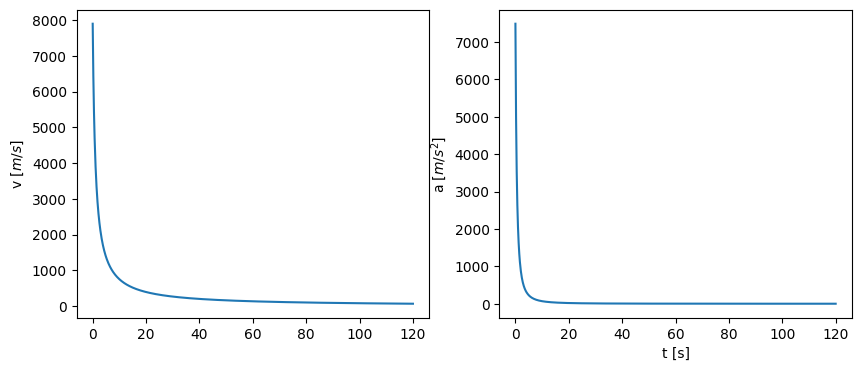

In [2]:
import matplotlib.pyplot as plt
import numpy as np

m=2000 #kg
#v_0 = 300 / 3.6 # m/s  # fast car breaking
v_0 = 7900 # km/s        # orbital velocityfast car breaking
air_density_10km = 1.2 * 0.1   #sea level rho_0=1.2kg/m3  0.1... coefficient for the altitude > 10000m 
k = 2 * 1 * air_density_10km  # CD ~ 2, A=1m2, 
alpha = -k/m
t = np.linspace(0, 120, 1000)
v = v_0/(1-alpha*t*v_0)
a = k/m * v**2

print("Critical time:", 1/(alpha*v_0))
#fig = plt.figure(figsize=(10,7))
fig, (ax_v, ax_a) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax_v.plot(t, v_0/(1-alpha*t*v_0))
ax_v.set_ylabel("v [$m/s$]")
ax_a.plot(t, a)
ax_a.set_xlabel("t [s]")
ax_a.set_ylabel("a [$m/s^2$] ")

The deceleration for the initial velocity around the orbital velocity of a spaceship $v_0=7900$ $m/s$ is about $700$ times the acceleration of gravity. Therefore, our model predicts that the crew would be instantly dead. This clearly indicates that our model is not valid for the spaceship reentry. Indeed, the assumption of the constant air density is not valid since the atmosphere is nearly not present above $100km$ while the model assumes air density at about $10km$. The significant heat processes and aerodynamic lift control have yet to be considered to obtain a reasonably good model.

However, the model is good enough for the deceleration of a car due to air at sea level.


# Car acceleration - variation of constants
Consider car acceleration just for the velocity:

$$
  mv'(t) = Pt - c v(t), \qquad v(0)=0
$$

The term $Pt$ represents a linearly increasing engine force (not very realistic),
the term $-cv$ represents a friction force.

This ODE is again of the first order but is **linear** as only linear terms contain the unknown function $v$ and its derivatives.
If there is no term dependent only on $t$, we call the equation homogeneous. In our case, there is the absolute term $Pt$, so it is an inhomogeneous equation.
The absolute term may be nonlinear, or the friction coefficient $c$ could be a nonlinear function of the time, and still, the equation is linear with respect to $v$.

We usually write linear equations in a form where the terms containing $v$ are on the left and the absolute term is on the right:

$$
  mv'(t) + c v(t) = Pt 
$$

The first step is dropping of the absolute term and solution of the resulting homogeneous equation $mv'= - cv$. Using the separation of variables,
one can find the generic solution $ v(t)=Ce^{-\alpha t}$, $\alpha = c/m$. Then, we look for the solution of the original equation in the form:

$$
   v(t) = C(t) e^{-\alpha t}
$$

where we have performed *variation of the integration constant* $C$. To find the function $C(t)$, we substitute the incomplete solution into
original equation:

$$
  m C'(t) e^{-\alpha t} - m \alpha C(t) e^{-\alpha t} = Pt - m \alpha C(t) e^{-\alpha t}.
$$

We can cancel the last terms on both sides (this always happens due to a particular form of the solution), then we express $C'$ and integrate by parts:

$$
  C(t) = \frac{P}{m} \int te^{\alpha t} \d t = \frac{P}{m\alpha^2}\left(\alpha t - 1\right)e^{\alpha t} + C_0.
$$

The whole solution is then:

$$
  v(t) = C(t) e^{-\alpha t} = C_0 e^{-\alpha t} + \frac{P}{m\alpha^2} (\alpha t - 1)
$$

where $C_0$ must be determined from the initial condition. Note that the initial condition affects only the first term of the solution that corresponds to the solution
homogeneous equation, while the second term, called the **particular solution** does not depend on the initial condition, but depends on the absolute term.

In [3]:

# convert PDF to PNG
from pdf2image import convert_from_path
images = convert_from_path('maxwell_diagram.pdf', dpi=150)
assert len(images) == 1 
images[0].save('maxwell_diagram.png', 'PNG')

# Damped and driven harmonic oscillator
In many applications, various oscillating systems need to be investigated. Notorious examples are pendlum, spring, or RCL circuit. 
A common mechanism of these oscillators is a reversible exchange of two forms of energy: kinetic-potential (pendulum), kinetic-elastic (spring), or electric potential-magnetic field (RCL circuit). Moreover the system may be dumped and driven by an external force. The structure of such a general system is depicted here, using symbols of Maxwell diagrams:

<center><img src="maxwell_diagram.png" alt="maxwell diagram" width="800"/></center>

The oscillator consists of a spring of stiffness $k$ (force depending on deformation $y$),
a damper with dynamic stiffness $\eta$ (force dependence on the rate of change of deformation) and a body with mass $m$, which is driven by an external force $f(t)$ (usually periodic).
Using Newton's second law and force balance, we get the ODE of second order (contains the second derivative of the unknown $y(t)$):

$$
 m\frac{{\d}^2y}{\d t^2}+\eta \frac{\d y}{\d t}+ky=f(t),\quad t>0,
$$

which we can simplify to the form:

$$
  y'' + \alpha y' + \beta y = F(t),\quad \alpha=\frac{\eta}{m},\quad \beta=\frac{k}{m},\quad F (t)=\frac{f(t)}{m}.
$$
The initial spring elongation/position does not fully determine the initial state of the system, as from the zero position, 
you can start the motion by providing an initial velocity. As we will see in the next lecture, we need an initial condition
for the function and its derivatives up to $(n-1)$ for an equation of order $n$. In particular, for our second-order system,
we will prescribe the deformation $y(0)=y_0$ and the velocity $y'(t)=y_1$.


First we shall refresh our memory and use a standard procedure to solve linear second order ODEs, later we will take more general approach leading us to the systems of equations. The first step is the solution of the homogeneous equation, i.e., with $f(t) = 0. To this end, we form the **characteristic equation**: 

$$
  Y^2 + \alpha Y + \beta =0.
$$

This quadratic equation has either one (multiple) or two (generally complex) roots $Y^+$, $Y^-$, then the homogeneous equation has a solution in the form

$$
   y(t) = C^{+}e^{Y^{+} t} + C^{-}e^{Y^{-} t}.
$$

We have a simple sum of two exponentials for real roots (the case of dominant damping). For a multiple root of $Y$, the solution is of the form

$$
  y(t) = C_1 t e^{Yt} + C_2 e^{Yt}.
$$

For complex conjugate roots $Y^{\pm} = a \pm b$, the integration constants $C^{+}$, $C^{-}$ are also complex conjugate since
the solution $y(t)$ is supposed to be a real function, then the solution can be written as:

\begin{align}
   y(t) &= (A + i B) e^{at} e^{ibt} + (A-iB)e^{at}e^{-ibt} = A e^{at} (e^{ ibt} + e^{-ibt}) + B e^{at} i(e^{ibt} - e^{-ibt}) \\
   &= e^{at}\big( 2 A cos(bt) + 2 B sin(bt) \big).
\end{align}

For some right-hand sides $F$, the variation of constants can be applied to obtain particular solutions.

We will now indicate where the characteristic equation solution method shown above came from. 
The key trick is to convert a higher-order equation to a system of lower-order equations. 
We introduce a new variable $z(t)$ for the derivative $y'$,
then, we can write the original equation in the form of a system:
\begin{align}
   y'(t) &= z(t), & y(0) = y_0\\
   z'(t) &= - \alpha z(t) - \beta y(t) + F(t), & z(0)= y_1
\end{align}
We can also write this linear system in a vector form

$$
    \frac{\d}{\d t}
    \begin{pmatrix}
       y \\ z
    \end{pmatrix}
    =
    \begin{pmatrix}
        0 & 1\\
        -\beta & -\alpha
    \end{pmatrix}
    \begin{pmatrix}
        y \\ z
    \end{pmatrix}
    +
    \begin{pmatrix}
     0 \\ F(t)
    \end{pmatrix}.
$$

With appropriate notation of vectors and matrices, this can be written even simplier:

$$
    \vc Y'(t) = \tn A \vc Y(t) + \vc F(t).
$$

We will use this vector notation a lot in the future. Vectors will always be written in bold, and matrices in double font.

Now, the characteristic equation is just the **characteristic equation** of the matrix $\tn A$, and $Y^\pm$ are the eigenvalues of the matrix.
In the third lecture, we will see that we actually use eigenvalues to define the exponential of the matrix, which leads to the solution of the homogeneous linear system.

## Eigenvalues and eigenvectors

Eigenvalue $\lambda$ and eigenvector $\vc u$ of a matrix $\tn A$ satisfies the equation:
$$
    \tn A \vc u = \lambda \vc u.
$$
For the eigenvectors, the matrix multiplication acts as multiplication by the corresponding eigenvalue. 
This and other [interesting properties](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)
have significant applications.

To solve the equation and find eigenvalues and eigenvectors, we write the equation in the form:
$$
    (\tn A  - \lambda \tn I)\vc u = 0,
$$
where $\tn I$ is the identity matrix:
$$
    \tn I = \begin{pmatrix}
    1 & 0 & \dots\\
    0 & 1 & \dots\\
    \vdots &\vdots& \ddots
    \end{pmatrix},\qquad \text{ or }\qquad
    I_{ij} = \left\{\begin{array}{ll}
        1\quad &\text{for } i=j\\
        0\quad &\text{otherwise}
        \end{array}\right.
$$

The last equation always has a trivial solution $\vc u =0$ (i.e. zero vector). To get a nontrivial solution, the matrix $\tn A - \lambda \tn I$ must not be invertible, i.e. some rows have to be linearly dependent, which means that the [determinant](https://en.wikipedia.org/wiki/Determinant) must be zero:
$$
    \big|\tn A - \lambda \tn I\big| = 0.
$$
On the left-hand side, there is a polynomial of degree $n$, called the [characteristic polynomial](https://en.wikipedia.org/wiki/Characteristic_polynomial); the whole thing is called **characteristic equation** of the matrix $\tn A$.


Applying the [rule](https://en.wikipedia.org/wiki/Determinant) for the determinant  of a 2x2 matrix, we can derive the characteristic equation of our ODE system: 
$$
\begin{vmatrix}
0 - \lambda & 1\\
-\beta & -\alpha - \lambda
\end{vmatrix}
=
 (-\lambda)\cdot (-\alpha-\lambda) - (-\beta) \cdot 1 = \lambda^2 + \alpha \lambda  + \beta = 0 
$$

Hence, this is where the characteristic equation of a scalar ODE of higher order comes from.

# Examples of ODE systems

## System predator-pray
Consider a simple ecological system composed of a population of predators and their prey (the classic example is "foxes and hares").
Let $x(t)$ denote the number of hares and $y(t)$ the number of foxes at time $t$ with initial sizes $x_0$ and $y_0$.
Hares have an unlimited food source; foxes live only by hunting hares.
This ecological system is described by the Lotka-Volterra system of differential equations:

\begin{align}
  \frac{\d x}{\d t} &= x(a-\alpha y), \quad x(0)=x_0\\
  \frac{\d y}{\d t} &= y(-c+\gamma x), \quad y(0)=y_0.
\end{align}

The meaning of the terms on the right side is as follows: $ax$ expresses the natural increase of hares per unit of time,
$-\alpha xy$ the death of hares due to interaction with foxes,
$\gamma x y$ increase of foxes due to interaction, $-cy$ natural dying of foxes.
Let's denote $\vc x = (x,y)^T$ and write it in the vactor form:

$$
   \frac{\d \vc x}{\d t} = \begin{pmatrix} x'\\ y' \end{pmatrix}
   = \begin{pmatrix} a & -\alpha x \\ \gamma y & - c\end{pmatrix}
     \begin{pmatrix} x \\ y\end{pmatrix} = \vc F(\vc x).
$$

We see that the matrix on the right side itself depends on the solution itself, 
therefore, it is a non-linear system of ODEs in the first order.


## How the solution looks like?

/home/jb/workspace/jupyter_notebooks/jupy-env/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `a_tol`.
  warn("The following arguments have no effect for a chosen solver: {}."


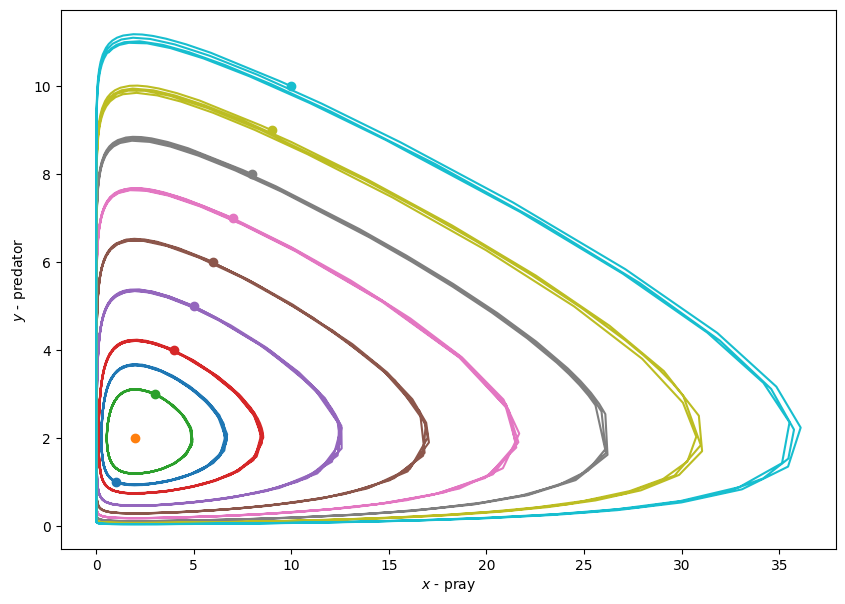

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

a = 10
alpha = 5
gamma = 1
c = 2

# Function for the right-hand side.
def func(t, Y):
    x, y = Y
    return [x*(a-alpha*y), (gamma*x-c*1)*y]
    
# Let us plot the solution trajectory for different initial conditions.
fig, ax = plt.subplots(1, 1, figsize=(10,7))
for col, x0 in enumerate(np.linspace(1, 10, 10)):
    t_span = [0, 10]
    Y0 = [x0, x0]
    sol = integrate.solve_ivp(func, t_span, Y0, a_tol=1e-3, method="LSODA")
    ax.plot(sol.y[0], sol.y[1], c=f"C{col}")
    ax.plot(Y0[0], Y0[1], ls="", c=f"C{col}", marker="o", label="points")

    ax.set_xlabel("$x$ - pray")
    ax.set_ylabel("$y$ - predator")


First, notice that trajectories are not exact due to used numerical method.

We observe that there is a stationary point close to the point $[2,2]$. It is a  point with zero time derivatives. Therefore, the position of such a point is  given by the system of equations:

\begin{align}
   x' &= 0 = a x - \alpha xy &&= x(a  - \alpha y),\\
   y' &= 0 =  \gamma xy - c y &&= y(\gamma x - c 1).
\end{align}

So there are in fact two stationary points $[0,0]$ and $[c/\gamma, a/\alpha]$.

Scaling the variables $x = s X$ and $y = t Y$ is equivalent to the usage of different units for the number of hares/foxes. We plug these into the ODE system, getting:
\begin{align}
   x' &= sX' = s a X - s \alpha t X Y,\\
   y' &= tY' = t \gamma s X Y - t c Y.
\end{align}

Finally, we divide by $s$ and $t$, respectively, and we set $t = a/\alpha$, $s=c/\gamma$ to obtain a system with just two parameters and stationary point $[1,1]$:

\begin{align}
   X' &= a X (1 -  Y),\\
   Y' &= c Y (X - 1).
\end{align}


## Brief investigation of the parameters

We can set units of $x$ so that $x=1$ means number of hares born per unit of time. This effectively sets $a=1$. Similarly, the $y$ could be rescaled so that single unit of foxes $y=1$ die per unit of time, which is eqivalent to set $c=1$. Finally, we can set the time unit in such a way, that any fox kill a hare once per the time unit, equivalent to set $\alpha=1$.

Therefore solutions to the original system differs from the solutions to the system with $a=\alpha=c=1$ only by scaling of $x$, $y$, and time $t$. The shape of corresponding plots is therefore governed by the $\gamma$ parameter only. Let us plot the solution trajectories, i.e. parametric curves $[x(t), y(t)]$: 

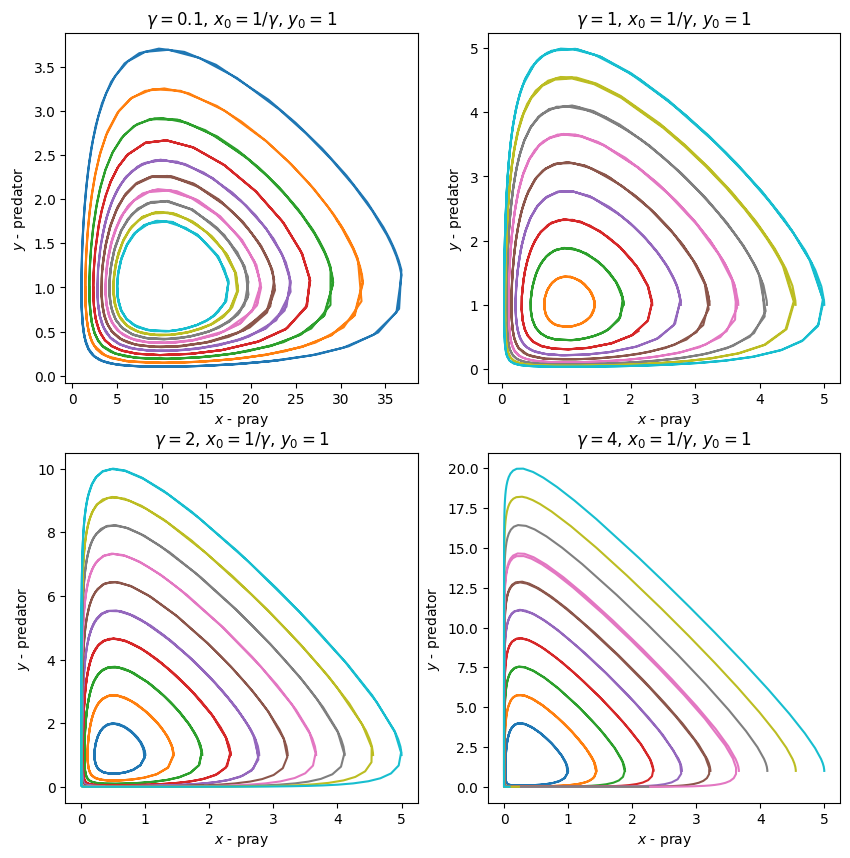

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def solve(gamma, x0):
    def func(t, Y):
        x, y = Y
        return [x*(1-y), (gamma*x-1)*y]
    
    t_span = [0, 20]
    Y0 = [x0, 1]
    return integrate.solve_ivp(func, t_span, Y0, a_tol=1e-5, method="LSODA")
    
fig, axs = plt.subplots(2,2, figsize=(10,10))
axes = [ax for row in axs for ax in row]
gammas = [0.1, 1, 2, 4]
for ax, gamma in zip(axes, gammas):
    for c, x0 in enumerate(np.linspace(1, 5, 10)):
        sol = solve(gamma, x0)    
        ax.plot(sol.y[0], sol.y[1], c=f"C{c}")
    ax.set_xlabel("$x$ - pray")
    ax.set_ylabel("$y$ - predator")
    ax.set_title(f"$\gamma = {gamma}$, $x_0 = 1/\gamma$, $y_0=1$")
    

Using suitable intitial condition $x_0 = 1/\gamma$ and $y_0=1$, we observe that the trajectories are the same. Why? We also observe, that the seems to be a stationary point, i.e. point with zero time derivatives, the position of such point is given by the system:

\begin{align}
   x' &= 0 = x - xy &&= x(1 - y)\\
   y' &= 0 =  \gamma xy - y &&= y(\gamma x - 1)\\
\end{align}

The first equation has solutions $x=0$ and $y=1$, the second $y=0$ and $x= 1/\gamma$. So there are in fact two stationary points $[0,0]$ and $[1/\gamma, 1]$. So different values of $\gamma$ just selects particular trajectory. 

# Motion of $N$ bodies (e.g. planets)
Each planet has 6 state variables 3 of the position vector $\vc x_i$ and 3 of the velocity vector $\vc v_i$. 
The equation of motion for one planet is determined by the system:

\begin{align}
    \frac{\d}{\d t} \vc x_i &= \vc v_i\\
     m_i \frac{\d}{\d t} \vc v_i &= \vc F_i(\vc x_1, \dots \vc x_N)
\end{align}

with
$$
     \vc F_i = \sum_{j=1}^{N} \kappa \frac{m_i m_j}{|\vc r_{ij}|^3}\vc r_{ij},\quad \vc r_{ ij}=\vc x_j - \vc x_i
$$

Similarly, we can model the movement of ions in plasma or molecules in a chemical solution. Other examples are complex mechanical systems like a car (minimum model includes
about 9 degrees of freedom: 4 wheel angular positions, 4 wheel heights - suspension, 1 steering wheel position) or human skeleton, or human-bicycle mechanical system.

The following example is for 3 bodies and a 2D coordinate system. Notice:

- The momentum of the initial state: `2 * 10 + (-5) * 1 = 15` is nonzero causing whole system drift upwards. Try to compensate this by setting negative initial velocity for the first body.
- Initially the system seems to have relatively stable orbits but eventually two light bodies kick off each other out of the system.

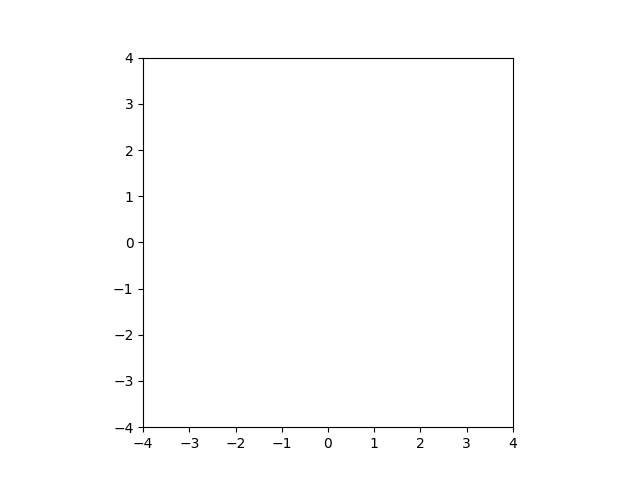

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
G = 1  # Gravitational constant
dt = 0.01  # Time step

# Masses of the three bodies
mass = [
100.0,
2.0,
1.0
]
color = ['g', 'r', 'b']

# Initial positions (x, y) and velocities (vx, vy)
position = np.array([
    [0, 0],    # X1, Y1
    [1, 0],    # X2, Y2 
    [-2, 0]    # X3, Y3
    ], dtype=float)

velocity = np.array([
    [0, 0],    # V1
    [0, 10],    # V2 
    [0, -5]    # V3
    ], dtype=float)

# Function to compute gravitational force
def compute_force(position, mass, i, j):
    r = position[j] - position[i]
    distance = np.linalg.norm(r)
    if distance == 0:
        return np.zeros(2)
    force = G * mass[i] * mass[j] * r / distance**3
    return force # numpy vector

# Lists to store positions for plotting traces
traces = [
    ([], []),   # X1, Y1
    ([], []),   # X2, Y2
    ([], [])    # X3, Y3
]


# Setup figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')

# Plot the bodies as scatter points, and create line objects for traces
body_plot =[]
for i in range(3):
    body, = ax.plot([], [], f'{color[i]}o', markersize=np.sqrt(mass[i])*2, label=f'Body {i}')
    body_plot.append(body)


trace_plot = []
for i in range(3):
    trace, = ax.plot([], [], f'{color[i]}-', lw=0.5)
    trace_plot.append(trace)


# Update function for the animation
def update(frame):
    global position, velocity, traces, body_plot, trace_plot
    # Compute forces
    f12 = compute_force(position, mass, 0, 1)
    f13 = compute_force(position, mass, 0, 2)
    f23 = compute_force(position, mass, 1, 2)

    # Update velocities
    velocity[0] += (f12 + f13) / mass[0] * dt
    velocity[1] += (-f12 + f23) / mass[1] * dt
    velocity[2] += (-f13 - f23) / mass[2] * dt

    # Update positions
    position += velocity * dt

    # Store positions for traces
    for i in range(3):
        for coord in range(2):
            traces[i][coord].append(position[i][coord])

    # Update trace lines
    for i in range(3):
        trace_plot[i].set_data(traces[i][0], traces[i][1])
        body_plot[i].set_data(traces[i][0][-1:], traces[i][1][-1:])

    return *trace_plot, *body_plot

# Animation (set frame=None for indefinite)
ani = FuncAnimation(fig, update, frames=100, interval=10, blit=True)

# Display the animation in Jupyter Notebook
plt.show()


# For HTML conversion and offline rendering.
#  from IPython.display import HTML
#  HTML(ani.to_html5_video())

# Double pendlum
Another example of a simple mechanical system described by a highly nonlinear system of ODEs and exhibiting a chaotic motion.

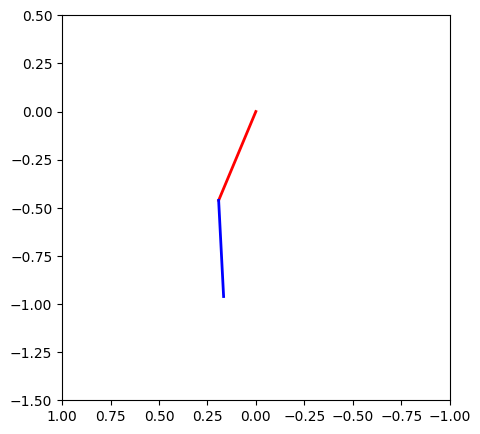

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylim([-1.5, 0.5])
ax.set_xlim([1, -1])

pendulum1, = ax.plot([], [], color="red", lw=2)
pendulum2, = ax.plot([], [], color="blue", lw=2)

def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])  
    return [pendulum1, pendulum2]

def update(n): 
    # n = frame counter
    # calculate the positions of the pendulums
    x1 = + L * sin(x[n, 0])
    y1 = - L * cos(x[n, 0])
    x2 = x1 + L * sin(x[n, 1])
    y2 = y1 - L * cos(x[n, 1])
    
    # update the line data
    pendulum1.set_data([0 ,x1], [0 ,y1])
    pendulum2.set_data([x1,x2], [y1,y2])
    return [pendulum1, pendulum2]
    
anim = animation.FuncAnimation(fig, update, init_func=init, frames=len(t), blit=True)

# For embedding into Jupiter notebook.
from IPython.display import HTML
HTML(anim.to_html5_video())

# anim.save can be called in a few different ways, some which might or might not work
# on different platforms and with different versions of matplotlib and video encoders
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'], writer=animation.FFMpegWriter())
#anim.save('animation.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
#anim.save('animation.mp4', fps=20, writer="ffmpeg", codec="libx264")
#anim.save('animation.mp4', fps=20, writer="avconv", codec="libx264")


#plt.close(fig)